In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

GCI for SVI:  -0.6106511992323894
p for SVI:  -1.5077717385016027
GCI for MCD:  -0.23087076714378293
p for MCD:  -2.2965465574811663
GCI for Ensemble:  -0.4056386843794189
p for Ensemble:  -0.855157071540371


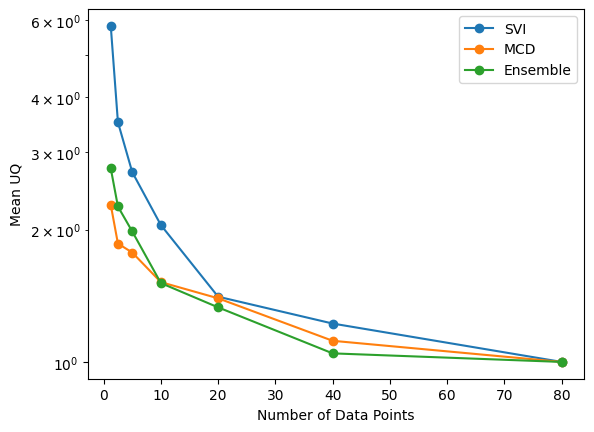

In [4]:
methods = ['SVI', "MCD", "Ensemble"]

pred_suff = "_Pred_Mean.csv"
std_suff = "_Pred_Std.csv"

for method in methods:
    data_1_25k_path = '../data/' + method + '/1.25k/Regular_1.25k'
    data_2_5k_path = '../data/' + method + '/2.5k/Regular_2.5k'
    data_5k_path = '../data/' + method + '/5k/Regular_5k'
    data_10k_path = '../data/' + method + '/10k/Regular_10k'
    data_20k_path = '../data/' + method + '/20k/Regular_20k'
    data_40k_path = '../data/' + method + '/40k/Regular_40k'
    data_80k_path = '../data/' + method + '/80k/Regular_80k'

    std_1_25k = np.loadtxt(data_1_25k_path + std_suff, delimiter=',')
    std_2_5k = np.loadtxt(data_2_5k_path + std_suff, delimiter=',')
    std_5k = np.loadtxt(data_5k_path + std_suff, delimiter=',')
    std_10k = np.loadtxt(data_10k_path + std_suff, delimiter=',')
    std_20k = np.loadtxt(data_20k_path + std_suff, delimiter=',')
    std_40k = np.loadtxt(data_40k_path + std_suff, delimiter=',')
    std_80k = np.loadtxt(data_80k_path + std_suff, delimiter=',')

    f = np.array([std_1_25k.mean(), std_2_5k.mean(), std_5k.mean(), std_10k.mean(), std_20k.mean(), std_40k.mean(), std_80k.mean()])

    p = np.log((f[2] - f[1]) / (f[1] - f[0])) / np.log(2)
    eps = (f[1] - f[0]) / f[0]

    plt.semilogy([1.25, 2.5, 5, 10, 20, 40, 80], f/f[-1], marker='o', label=method)

    GCI = np.abs(eps) / (2**p - 1)
    print(f"GCI for {method}: ", GCI)
    print(f"p for {method}: ", p)

plt.xlabel('Number of Data Points')
plt.ylabel('Mean UQ')
plt.legend()

plt.show()